In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [106]:
kick = pd.read_csv('cleaned_data')

In [107]:
kick.head(6)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,-1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,-27579.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,-44780.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,-4999.00,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,34,2375.00,1
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 00:00:00,2014-12-01 18:30:44,successful,16,US,1205.0,1000.00,19,205.00,1


In [108]:
kick.describe()

,ID,backers,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
count,3.314620e+05,331462.000000,3.314620e+05,3.314620e+05,331462.000000,3.314620e+05,331462.000000
mean,1.074288e+09,116.456315,9.939989e+03,4.152286e+04,32.955938,-3.158287e+04,0.403820
std,6.191996e+08,965.732911,9.664561e+04,1.109279e+06,12.714064,1.112869e+06,0.490663
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02,0.000000,-1.663614e+08,0.000000
25%,5.371698e+08,2.000000,5.000000e+01,2.000000e+03,29.000000,-9.224000e+03,0.000000
50%,1.074686e+09,15.000000,7.875000e+02,5.000000e+03,29.000000,-1.263095e+03,0.000000
75%,1.609865e+09,63.000000,4.609000e+03,1.500000e+04,35.000000,2.980750e+02,1.000000
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08,91.000000,1.983899e+07,1.000000


scatter plots for the continuous variables which are independent features against classes_state

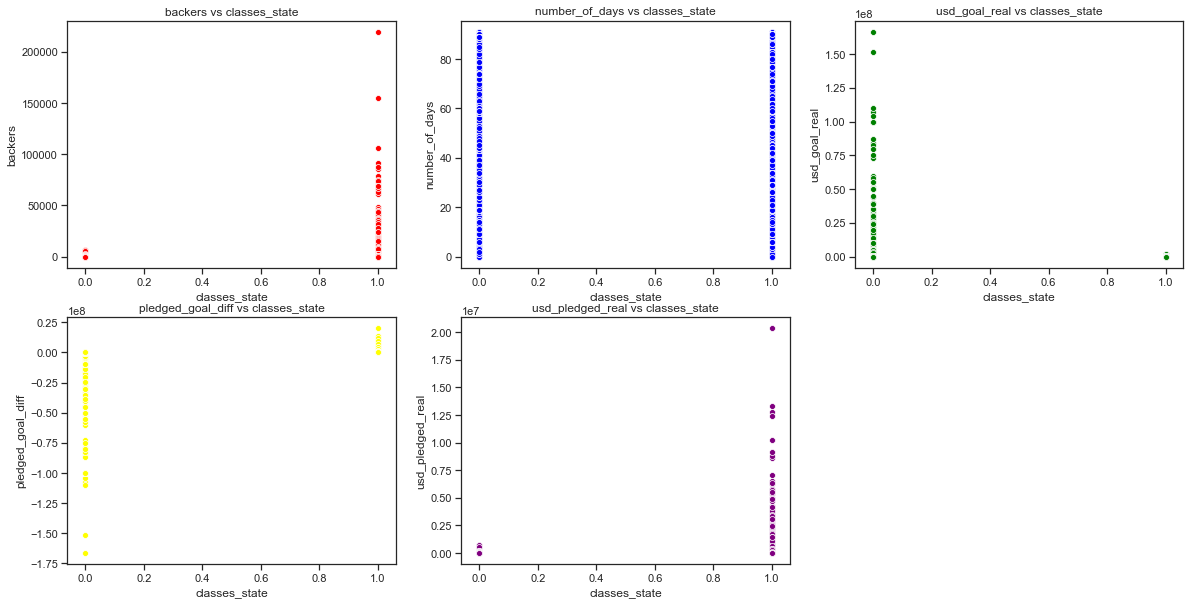

In [109]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax1.title.set_text('backers vs classes_state')
ax2.title.set_text('number_of_days vs classes_state')
ax3.title.set_text('usd_goal_real vs classes_state')
ax4.title.set_text('pledged_goal_diff vs classes_state')
ax5.title.set_text('usd_pledged_real vs classes_state')

sns.scatterplot(y = kick['backers'],x = kick['classes_state'] ,color = 'red', ax = ax1)
sns.scatterplot(y= kick['number_of_days'], x = kick['classes_state'], color = 'blue', ax = ax2)
sns.scatterplot(y = kick['usd_goal_real'], x = kick['classes_state'], color = 'green', ax = ax3)
sns.scatterplot(y= kick['pledged_goal_diff'], x = kick['classes_state'], color = 'yellow', ax = ax4)
sns.scatterplot(y= kick['usd_pledged_real'], x= kick['classes_state'], color = 'purple', ax = ax5)

The plot above gives us a lot of insights into how the continuous variables stack up against the successful and failed states of the kickstarter projects.
Based on the plots above.
1.Obvioulsy from the first plot, we can see the the most succesful projects have the most backers, with the maximum number topping out at above 200,000 backers and the maximum for the failed projects topping out at below 1000 backers.

2.The second plot details the number of days that the project was live which is the difference in the duration of when the project was launched and when the crowdfunding closed. there is not much difference judging from the plot but we can further analyse to get the real difference in categories and main categories of projects.

3.The third plot is quite interestingas this tells us that the more expensive the project is(amount needed to kickstart), the more it is likely to fail, as you can see the less expensive ones are more successful but this also dependent on other factors such as country and categories.

4.The fourth plot shows that the failed projects don't reach their goal amonut but this plot is giving us more information about successful projects as there are quite some few projects that just surpassed the amonut they needed to kickstart as of the deadline.

5.The final plot shows that pledged amonut for the successful projects is definitely higher than the pledged amount for the failed projects

## 6  BUSINESS QUESTIONS


1. Which categories have the most successful number of projects and which categories have the most failed number of projects based on counts and percentage? The client is not interested in categories of projects which has less than 2500 counts as thgey want a wide range of data to base their decisions on.

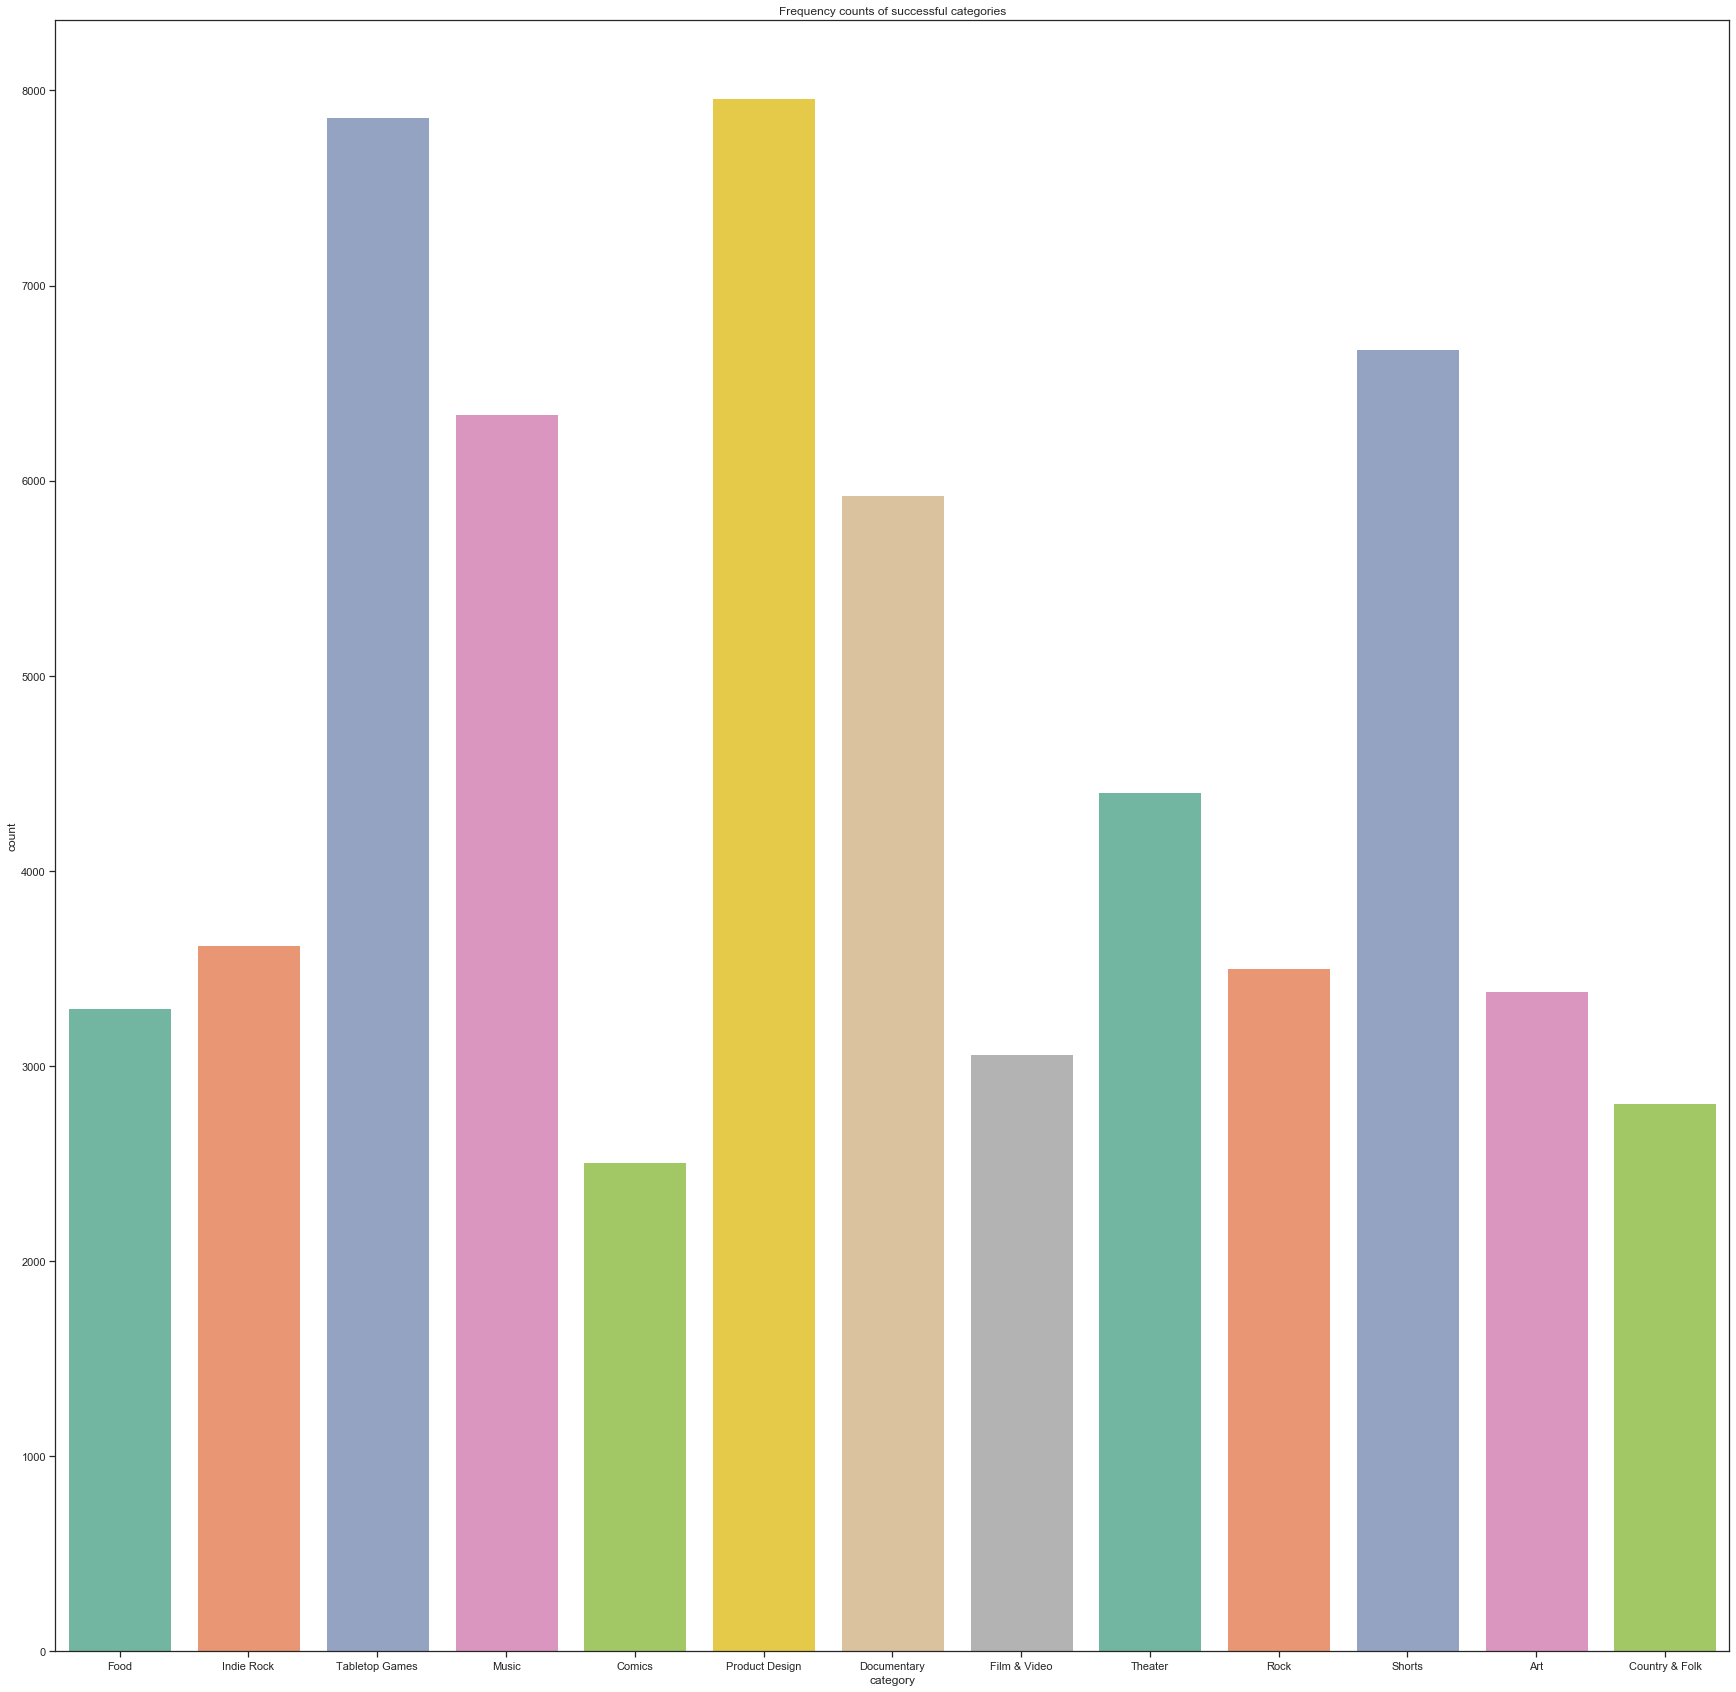

In [63]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='category', palette="Set2",data= kick[kick['state'] == 'successful'].groupby("category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Frequency counts of successful categories');

According to the plot above, product deign has the highest number of successful projects, followed closely by table top games and then shorts in third.

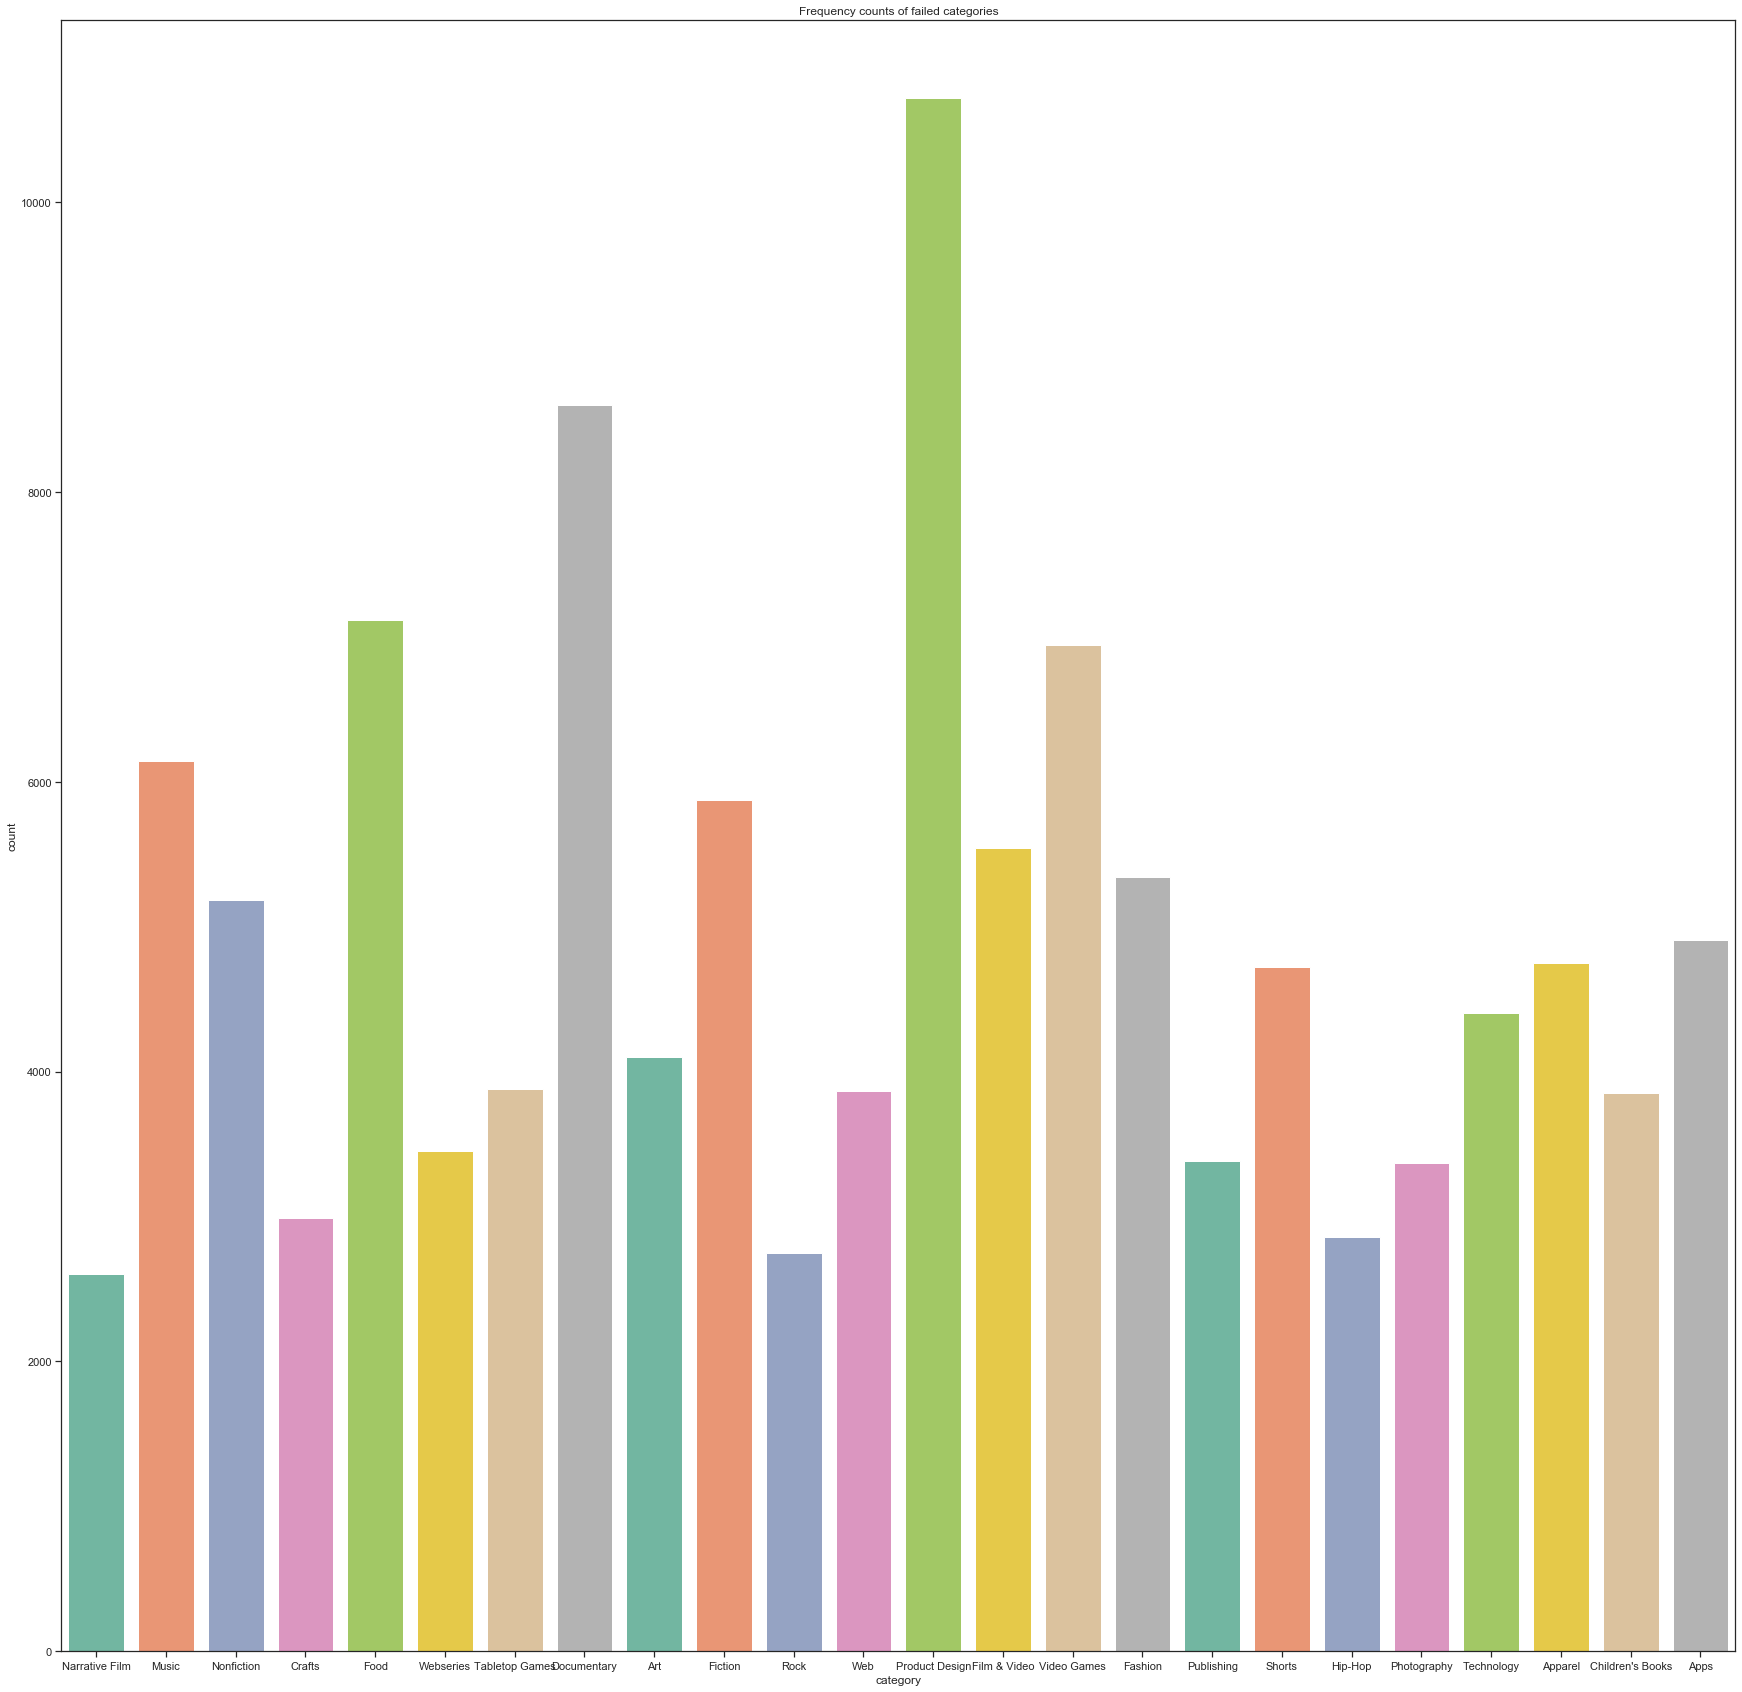

In [64]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='category', palette="Set2",data= kick[kick['state'] == 'failed'].groupby("category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Frequency counts of failed categories');

The plot above shows that product design is also the category that has failed the most followed by documentary and food in second and third place.

Now that we know the counts of each category with regards to failure and success, what to calculate next is the percentage of success and failure divided by the outcomes of the whole projects 

In [66]:
counts = kick.category.value_counts()
succ = kick[kick.state == 'successful'].category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_success = frame.sort_values('Percent').tail(10)
least_success = frame.sort_values('Percent').head(10)


For the top 10 project most success rates and least success rates:

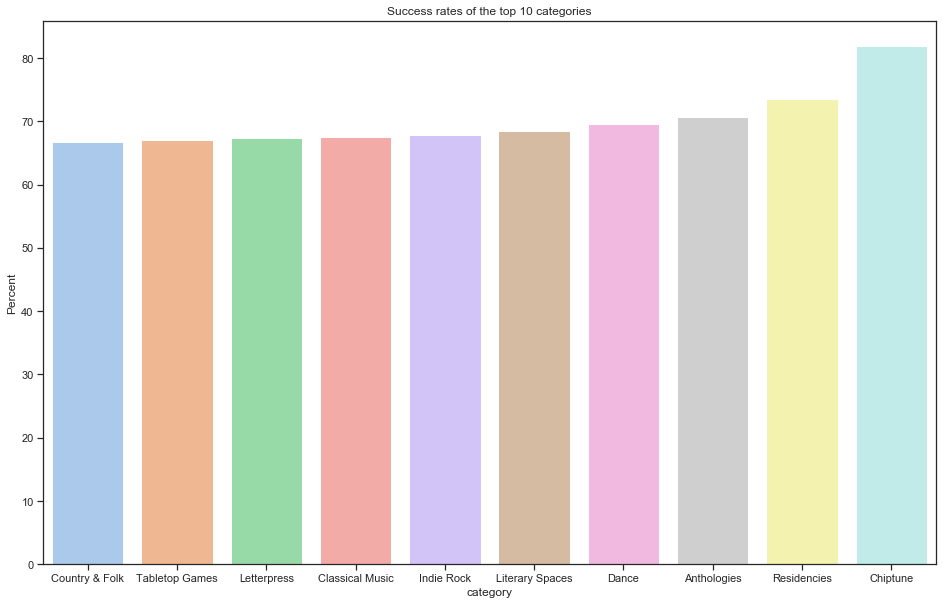

In [67]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="pastel",data = most_success, ax=ax)
plt.title('Success rates of the top 10 categories');

Clearly from the plot above the most success rates for the category of a project is chiptunes followed by residencies

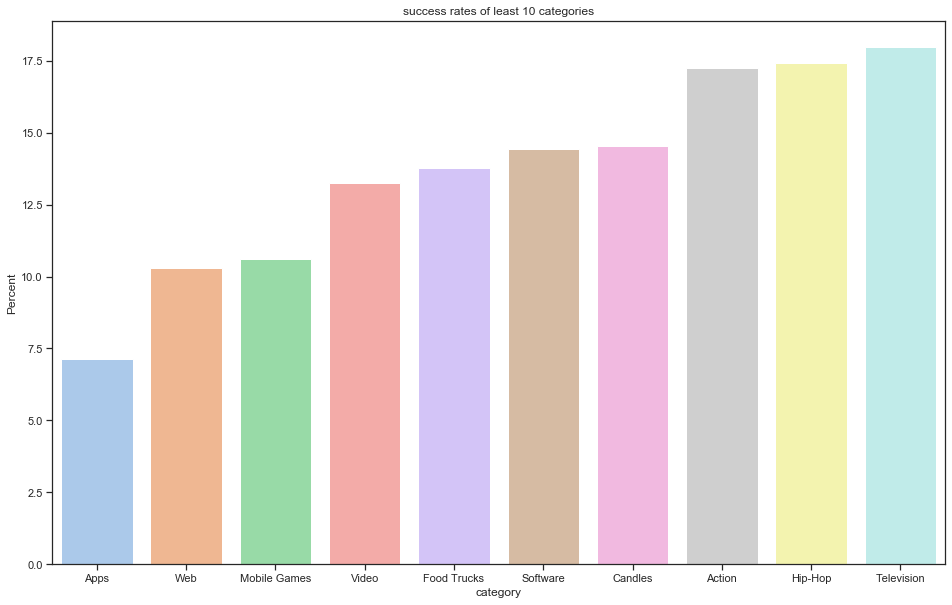

In [68]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="pastel",data = least_success, ax=ax)
plt.title('success rates of least 10 categories');

As evident by the plot, apps, web and Mobile games are the least successful categories.

In [38]:
counts = kick.category.value_counts()
succ = kick[kick.state == 'failed'].category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_fail = frame.sort_values('Percent').tail(10)
least_fail = frame.sort_values('Percent').head(10)


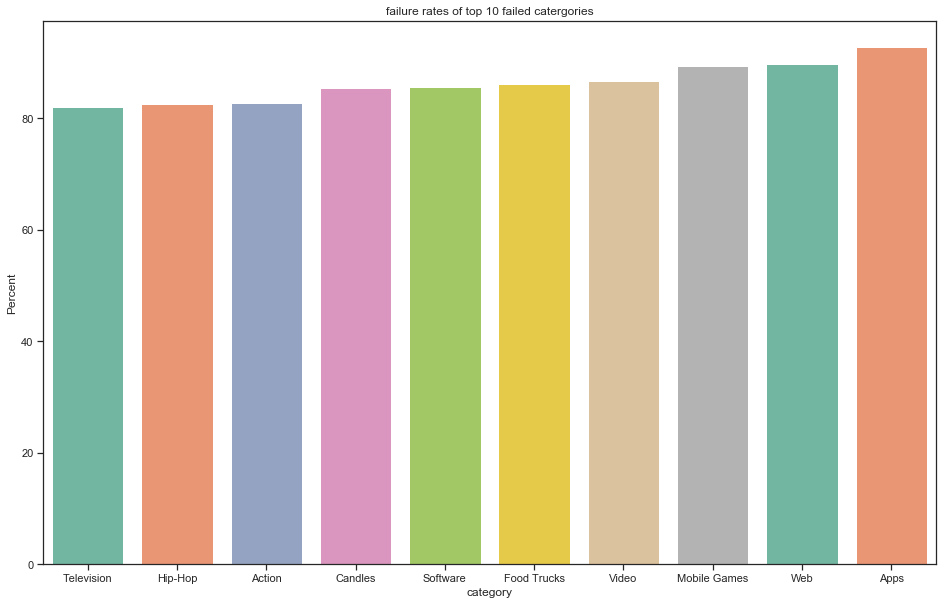

In [70]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="Set2",data = most_fail, ax=ax)
plt.title('failure rates of top 10 failed catergories');

Just as we guessed in the previous plots, Apps, web and Mobile games are the categories that failed the most

2. Which main categories have the most successful and most failed number of projects based on the counts and success rates?

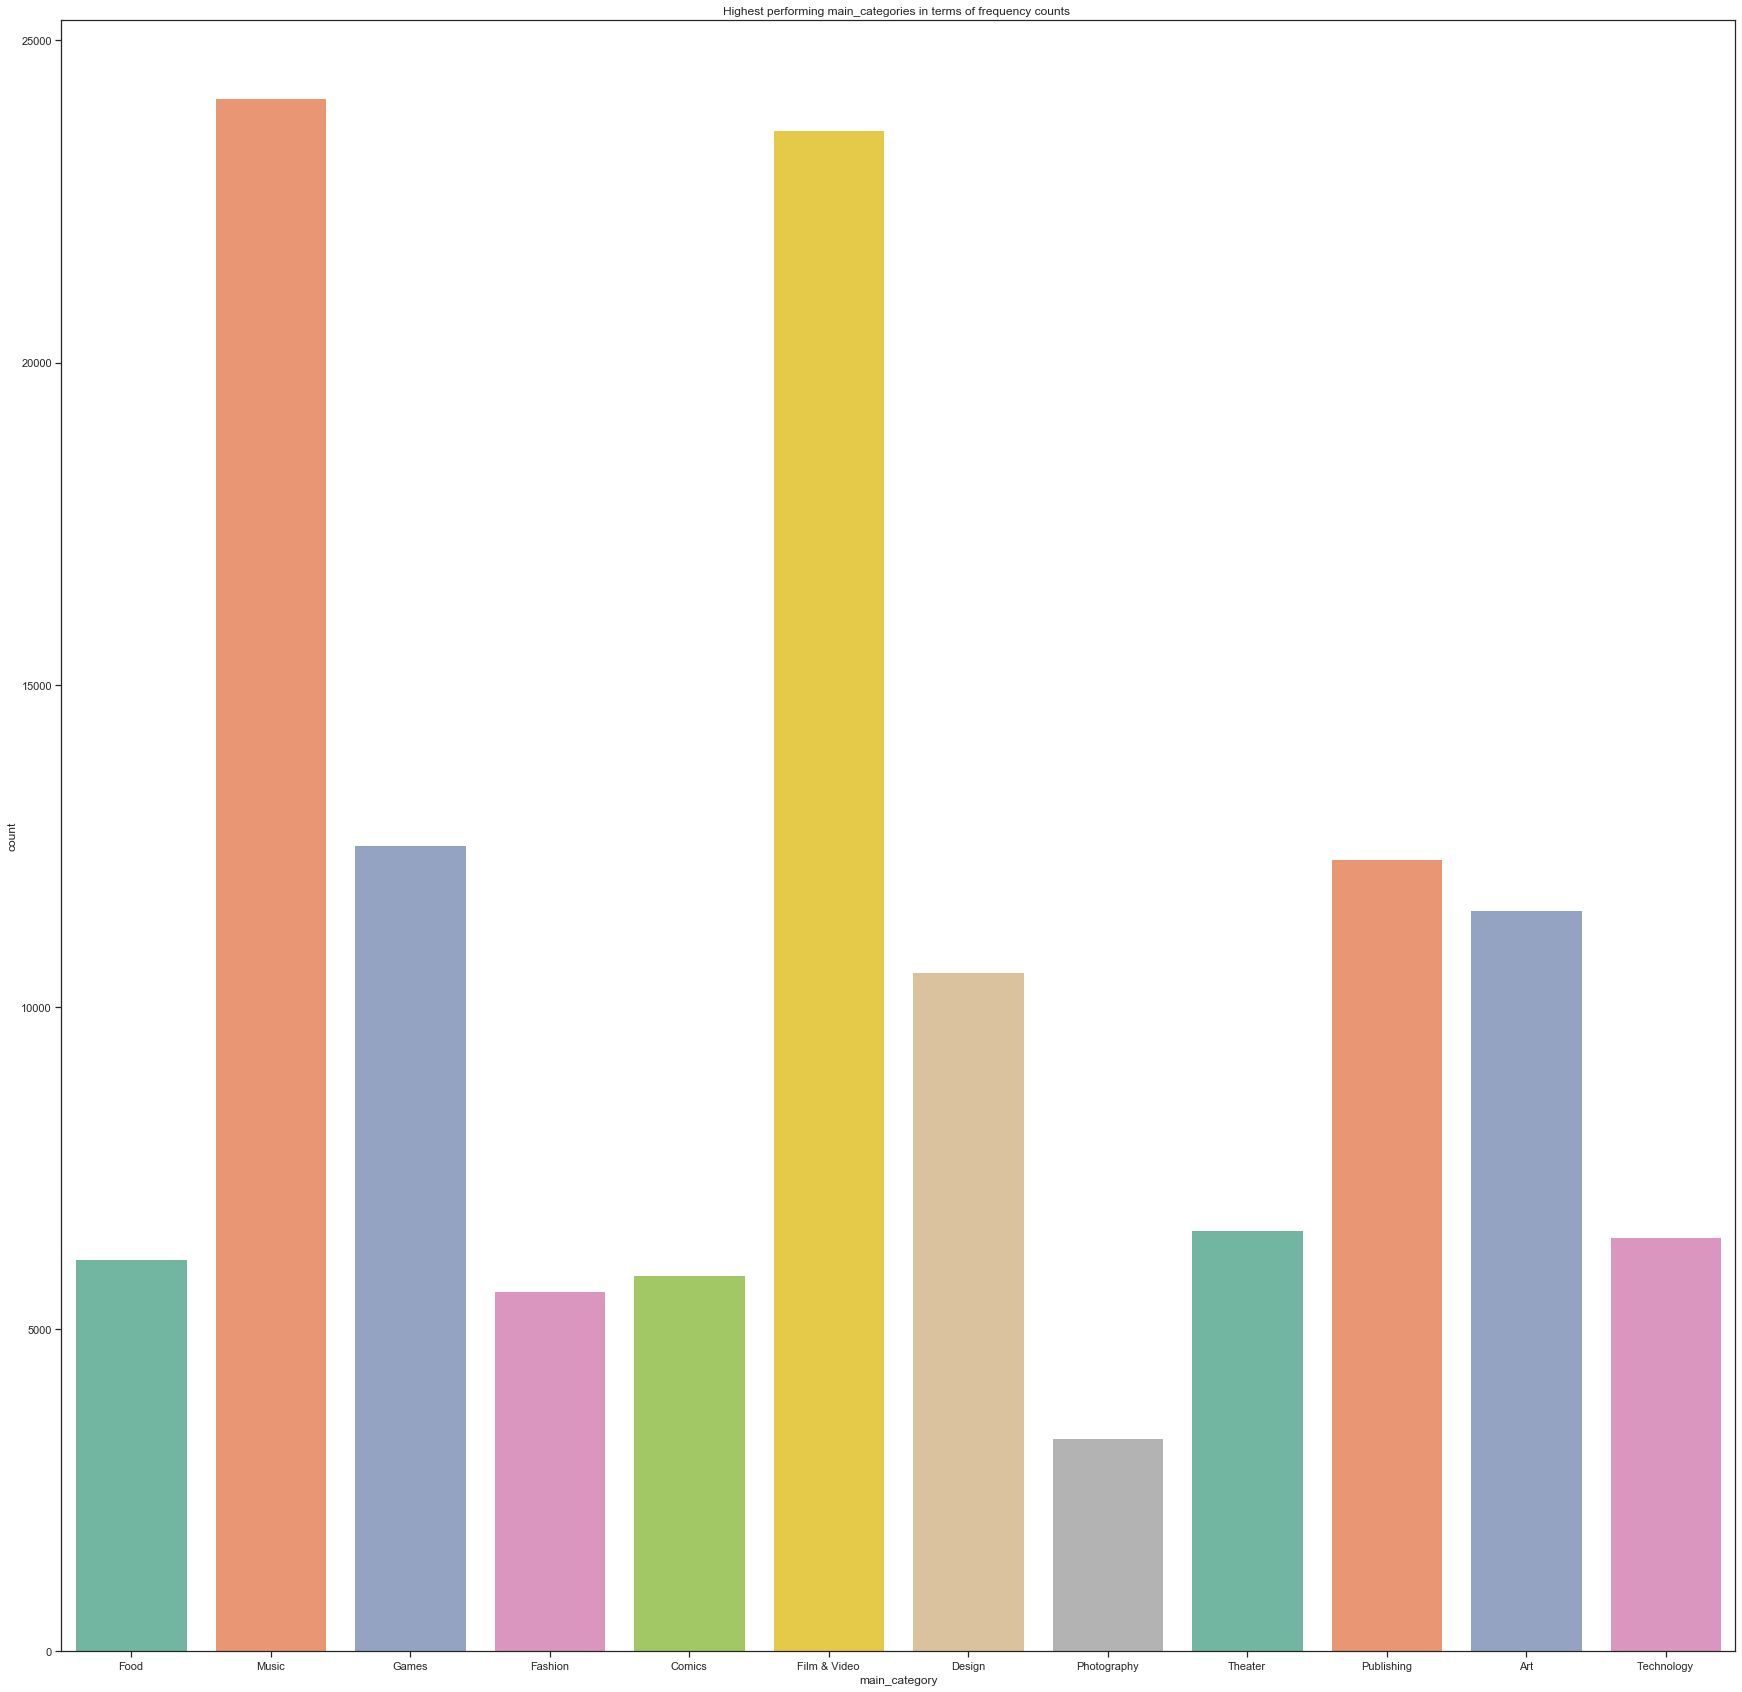

In [72]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='main_category', palette="Set2",data= kick[kick['state'] == 'successful'].groupby("main_category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Highest performing main_categories in terms of frequency counts ');

As evident Music has the highest number of successful main_categories on Kickstarter followed by film&video, games and art.

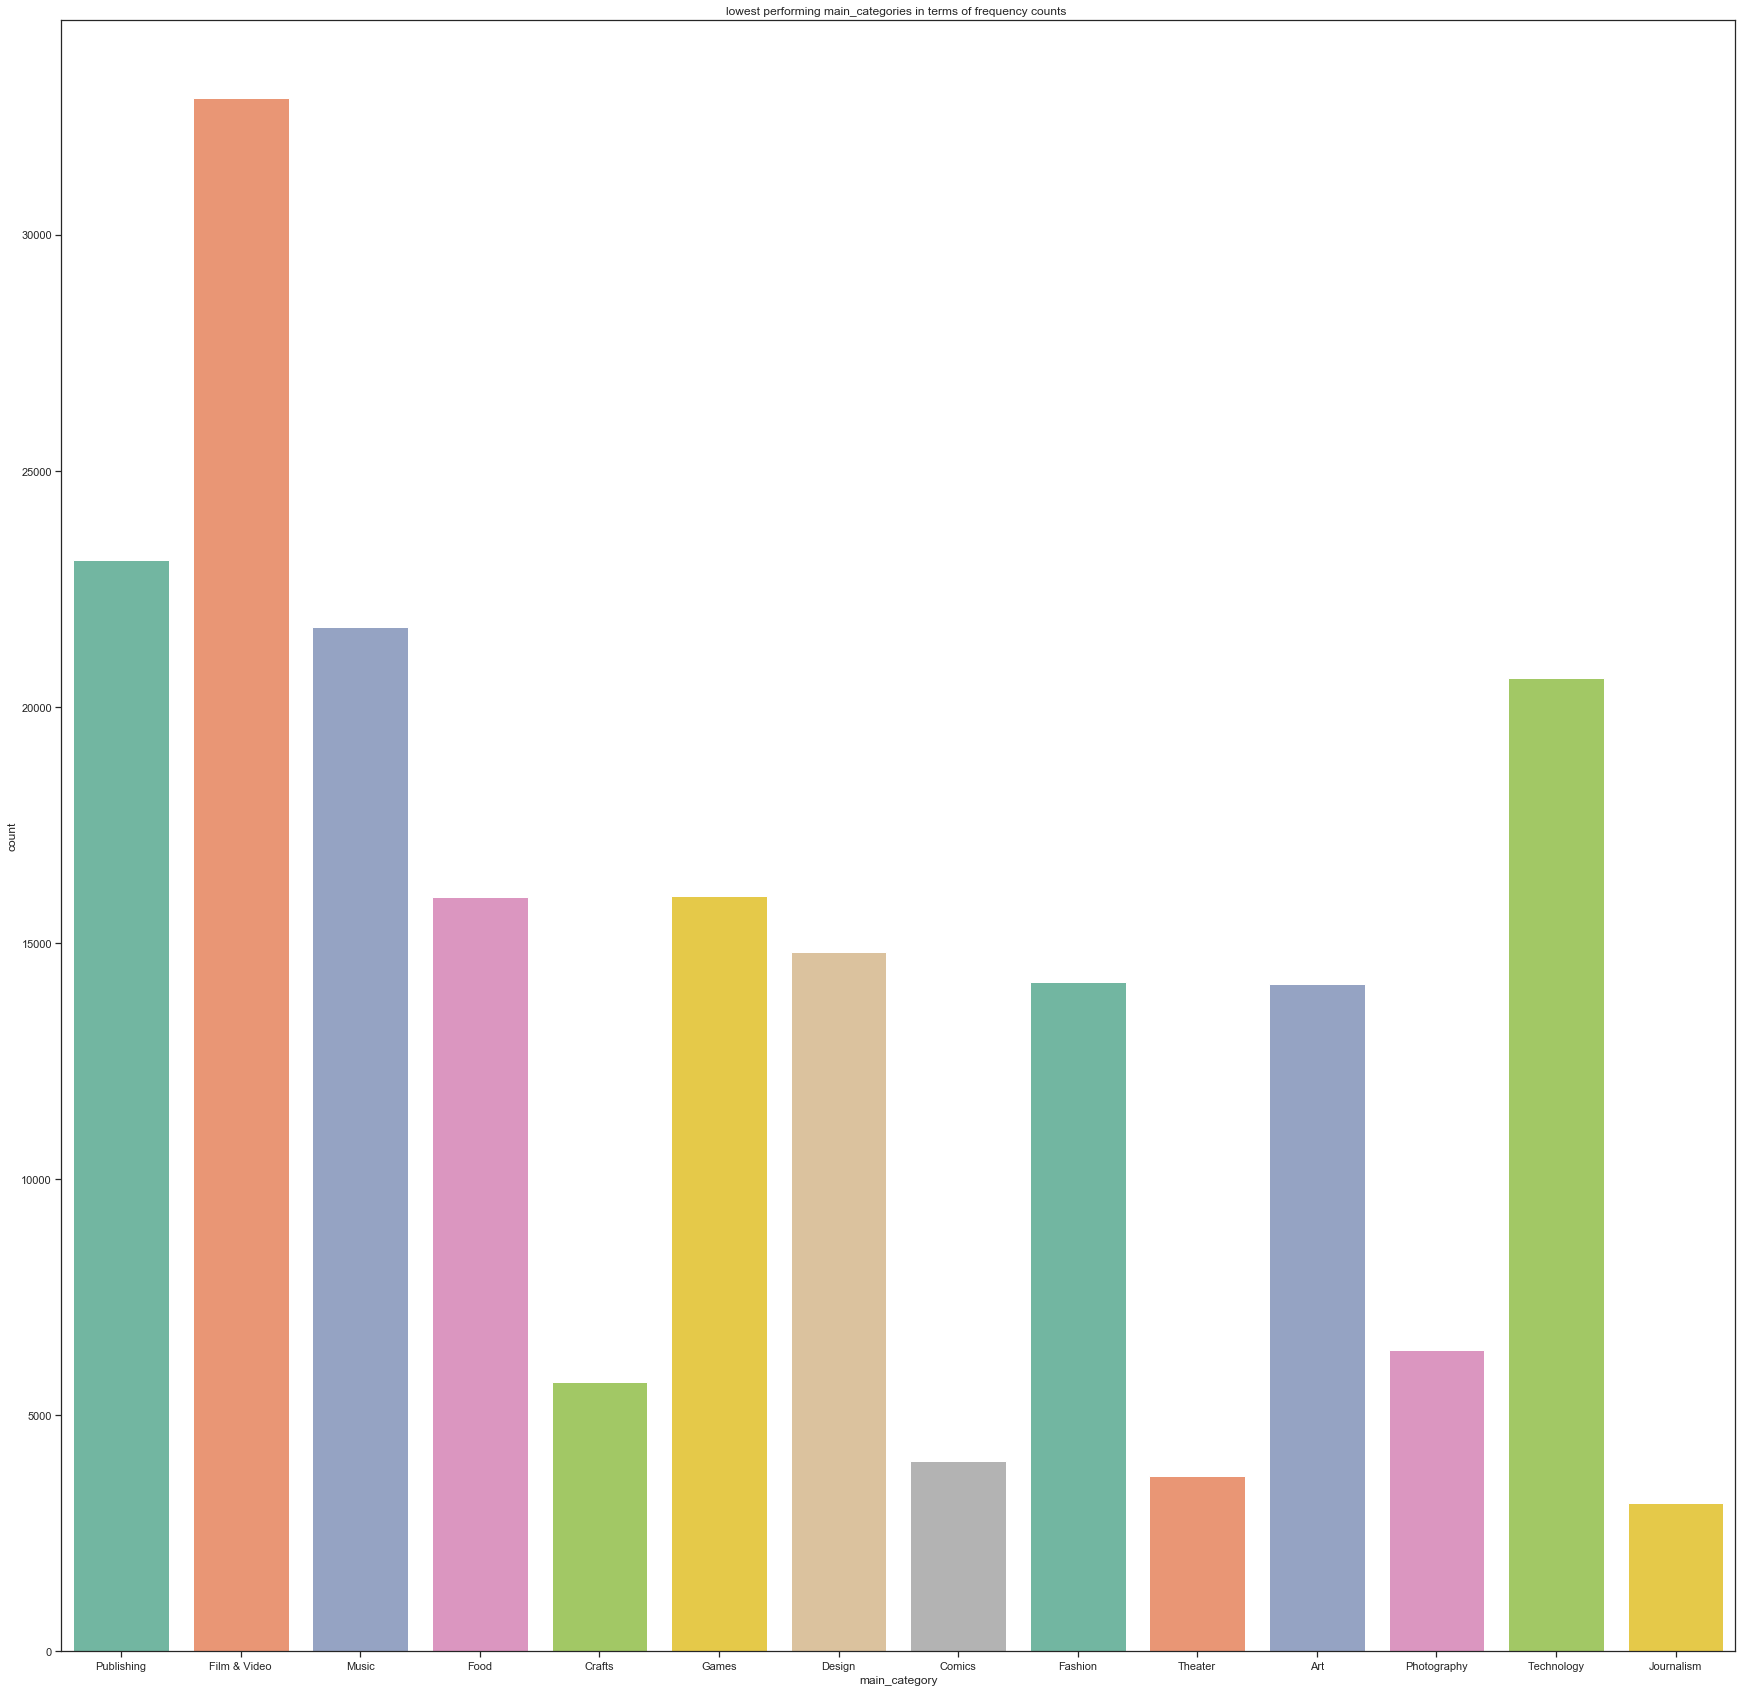

In [73]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='main_category', palette="Set2",data= kick[kick['state'] == 'failed'].groupby("main_category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('lowest performing main_categories in terms of frequency counts ');

Moving on to the highest number of failed projects in a main_category turns out to be Film&video followed by publishing and Music.

The next step is to calculate the success rates of these main categories

In [75]:
counts = kick.main_category.value_counts()
succ = kick[kick.state == 'successful'].main_category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['main_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_success = frame.sort_values('Percent').tail(10)
least_success = frame.sort_values('Percent').head(10)

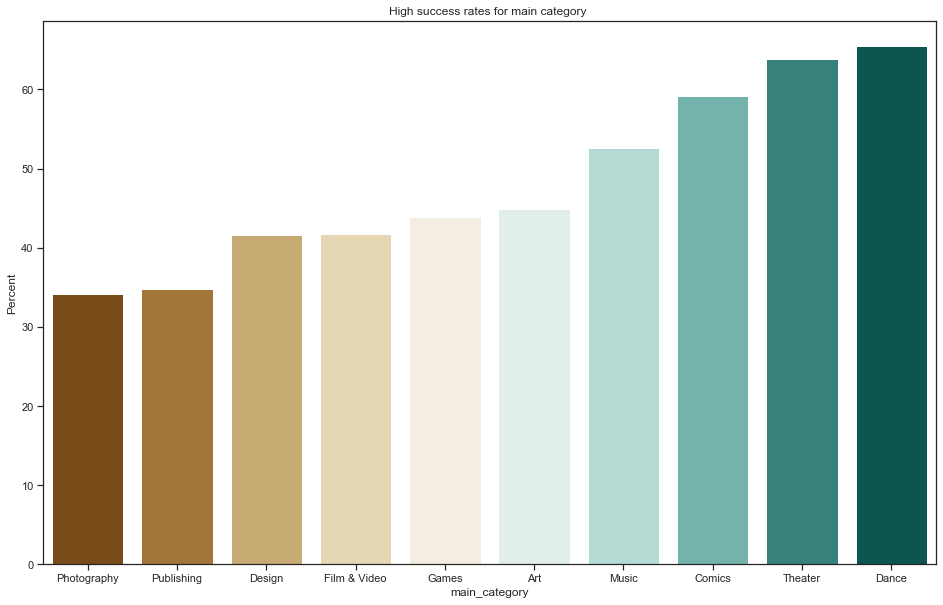

In [76]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='main_category',y = 'Percent', palette="BrBG",data = most_success, ax=ax)
plt.title('High success rates for main category ');

As evident by the plot above, the most success rates for a main category is Dance followed by theatre and comics.

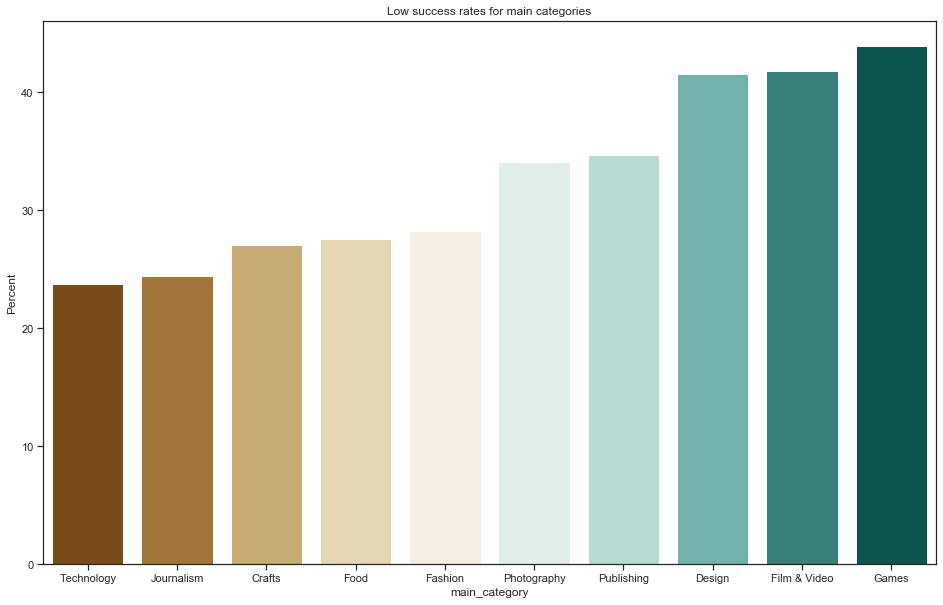

In [77]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='main_category',y = 'Percent', palette="BrBG",data = least_success, ax=ax)
plt.title('Low success rates for main categories');

And lastly, as evidenced by the plot above, the least successful main category is Technology followed by journalism and crafts.

3. What main_categories have the most amount of money pledged amongst successful and failed projects and the least amount of money pledged? This gives us an insight into what each different main category goal amount is needed to realise its goals and kickstart the project

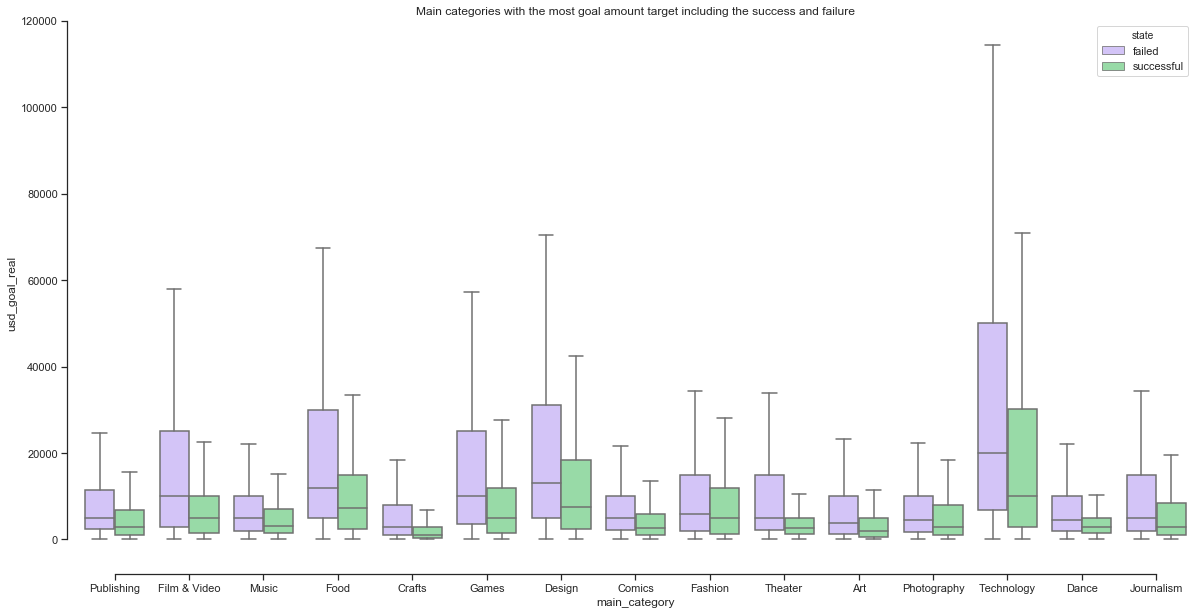

In [78]:
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="main_category", y="usd_goal_real",
            hue="state", palette=["m", "g"],
            data=kick, showfliers = False)
sns.despine(offset=10, trim=True)
plt.title('Main categories with the most goal amount target including the success and failure');

Judging by the measures of centrality in the box plot above, technology requires the most amount in pledged and the least amount needed for a main category is crafts. Seeing as the last question has indicated that technology main category has the least success rates and in terms of the money required to kickstart the project, it migh not be the most viable domian for our angel investors. 

4. For the successful and failed projects in our respective main_categories, which categories see more money than was originally pledged?

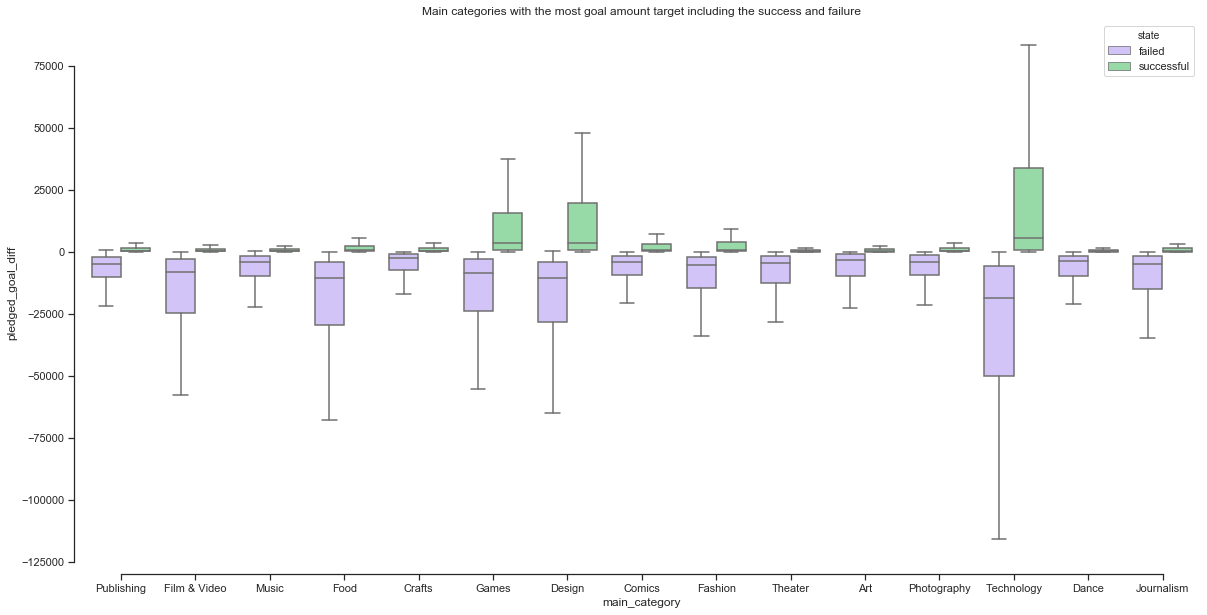

In [113]:
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="main_category", y="pledged_goal_diff",
            hue="state", palette=["m", "g"],
            data=kick, showfliers = False)
sns.despine(offset=10, trim=True)
plt.title('Main categories with the most goal amount target including the success and failure');

Judging from the plot above, even though technology main_category has least success rates in a project kickstarting, some of the successful projects end up having more money for their target goal than any other category followed by design and games main category 

5. The next question our client asked- what is the deadline bench mark for most successful projects on kickstarter? and what duration of days does have a lower cahnce of a project being successful?

Text(0.5, 1.0, 'Number of days it takes to make a kickstarter a success')

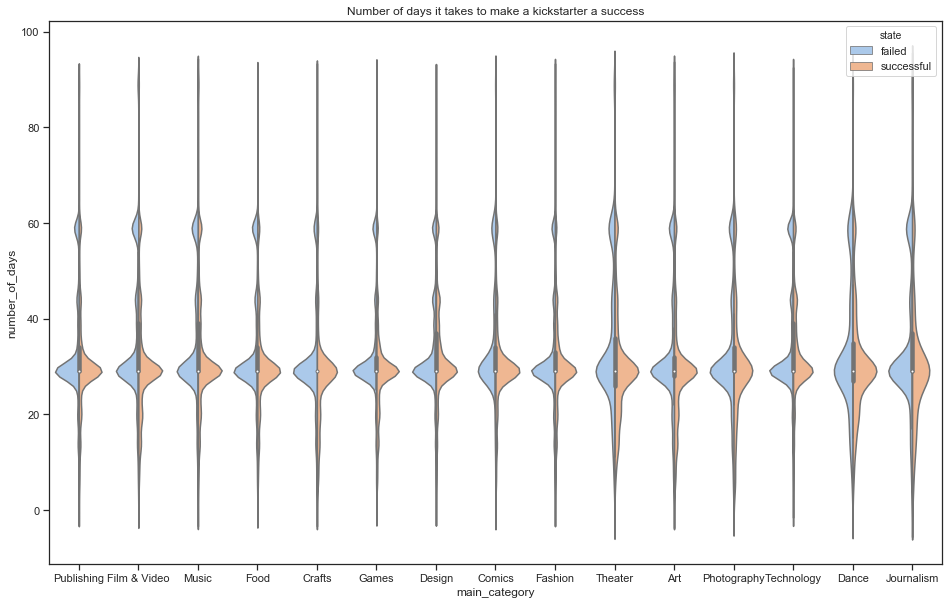

In [110]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.violinplot(x="main_category", y="number_of_days", hue= 'state', data=kick, split=True)
plt.title("Number of days it takes to make a kickstarter a success")

Judging from the plot above, we can see that the mean of both distributions for the failed and successful main_categories is around 30 days and between 40 and 60 days there is a higher chance of your kickstarter project ending up unsuccessful rather than successful

6. Our client would like to know the most popular words in the failed and successful projects



In [100]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


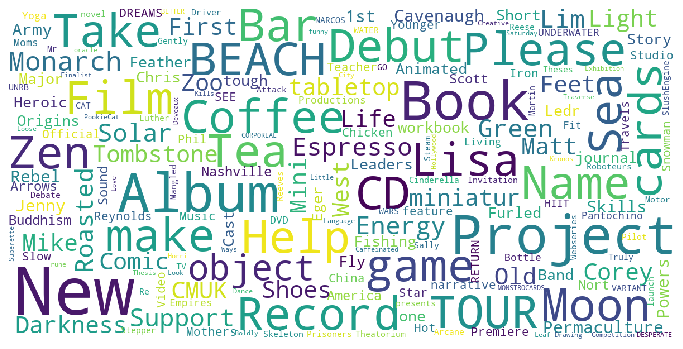

In [101]:
show_wordcloud(kick[kick.state == 'successful']['name'])

It is evident from the word cloud that the buzz words for successful projects are ZEN, CD, NEW, RECORD, ALBUM

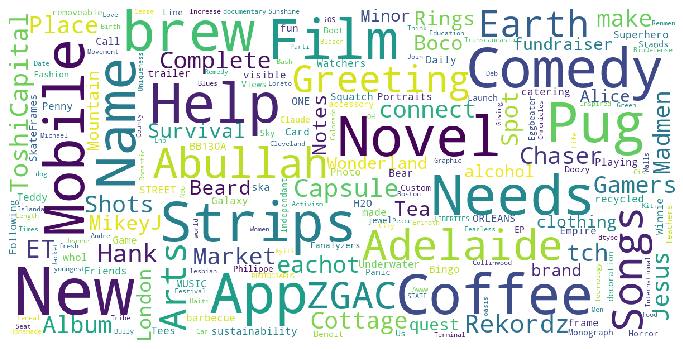

In [102]:
show_wordcloud(kick[kick.state == 'failed']['name'])

The buzzwords for failed projects is BREW, COMEDY, NOVEL, NEW , MOBILE